### This file contains the code to compute the similarity metric between an original file and its variants. It is parametrized by whether the file should be read as instructions or bytes.

Some earier file has the code to compute similarity between variants and plot this against effectiveness to prevent attacks

In [1]:
from scipy.stats import spearmanr, stats
from scipy.spatial.distance import euclidean
from random import randint, shuffle,sample,random
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
path='/Users/fesponda/research/Diversity/Data/probNog_probBilr_randomized_2/'

ORIGINAL_FILE=path+'original'
TRANSFORMATION_INTENSITY_FILE='percent_items_moved'
OUTPUT_GRAPH='probNog_probBilr_randomized_2.pdf'

###Variable that controls if data is treated as bytes or instructions
BYTE_FILE=True
if BYTE_FILE:
    TRANSFORMS_DIR=path+'binaries/'
else:
    TRANSFORMS_DIR=path+'instructions/'


# Function Definitions

In [2]:
def read_instructions(file1):
    f=open(file1, 'r')
    P1=[]
    for line in f:
        P1.append(line.strip().replace(" ",""))
    return P1



In [3]:
def read_ELF(file1):
    with open(file1, 'rb') as f:
        P1=list(f.read())
    return P1



In [4]:
#P1=read_instructions(ORIGINAL_FILE)


In [5]:
def read_instructions_only_inst(file1):
    f=open(file1, 'r')
    P1=[]
    for line in f:
        P1.append(line.split()[0])
    return P1


In [6]:
def read_file(file1,BYTE_FILE):
    if BYTE_FILE: 
        return read_ELF(file1)
    else:
        return read_instructions(file1)

In [7]:
##Create dictionary. For each byte in the block we create unique entry. If a byte is repeated we append if its the first, second, etc occurrence
def P1_dictionary(P1):
    P1_dict={}
    P1_occ={}
    for index,byte in enumerate(P1):   
        if byte  in P1_occ.keys():
            P1_occ[byte]+=1
        else:
            P1_occ[byte]=1
        value=str(byte)+'_'+str(P1_occ[byte]) ## here we create a unique value for each byte in the section
        P1_dict[value]=index+1 #we start to count at 1
    return P1_dict

In [8]:
####Rank instructions of a block according to first file template
def rank_P2(P1_dict,P2,intersection=False):
    a=[]        
    b=[]
    med_rank=len(P1_dict.keys())/2.0
    P2_dict={}
    P2_occ={}
    for index,byte in enumerate(P2):   
        if byte  in P2_occ.keys():
            P2_occ[byte]+=1
        else:
            P2_occ[byte]=1
        value=str(byte)+'_'+str(P2_occ[byte]) ## here we create a unique value for each byte in the section
        if value in P1_dict.keys():
            P2_dict[value]=P1_dict[value]
            a.append(index+1)
            b.append(P2_dict[value])
        elif not intersection:
            P2_dict[value]=0 ###zero for no existent value....check Maybe not bother, Maybe random, maybe average
            P2_dict[value]=med_rank 
            #P2_dict[value]=randint(1,90)
            a.append(index+1)
            b.append(P2_dict[value])
            
    #print(len(a),len(b))
    return a,b



# Execution

In [9]:
# Get list of files
l = [f for f in listdir(TRANSFORMS_DIR) if isfile(join(TRANSFORMS_DIR, f)) and f[0]!='.']

In [10]:
# Compute similarity between original and each transform
P1=read_file(ORIGINAL_FILE,BYTE_FILE)
P1_dict=P1_dictionary(P1)
result=[]
for knob in l:
    P2=read_file(TRANSFORMS_DIR+knob,BYTE_FILE)
    a,b=rank_P2(P1_dict,P2,intersection=True)
    corr,p=spearmanr(a,b)
    result.append((knob,corr,p))
print(result)

[('httpd-900_2', 0.7868930243368037, 0.0), ('httpd-1800_1', 0.7679202597739322, 0.0), ('httpd-1900_1', 0.8631251058199246, 0.0), ('httpd-800_2', 0.8722691526621776, 0.0), ('httpd-1800_0', 0.7669186965987448, 0.0), ('httpd-1900_0', 0.8354500603755096, 0.0), ('httpd-2000_0', 0.766566210754673, 0.0), ('httpd-2000_1', 0.7771525920342606, 0.0), ('httpd-1000_2', 0.8455415196248505, 0.0), ('httpd-1100_2', 0.8580622443502293, 0.0), ('httpd-1300_2', 0.7981185589076162, 0.0), ('httpd-1200_2', 0.8637135882536592, 0.0), ('httpd-1600_2', 0.8275962500215961, 0.0), ('httpd-700_1', 0.864674193012445, 0.0), ('httpd-600_1', 0.8386509035603447, 0.0), ('httpd-1700_2', 0.821511587593175, 0.0), ('httpd-500_0', 0.8757304947749054, 0.0), ('httpd-700_0', 0.864241550706105, 0.0), ('httpd-1500_2', 0.7673648950123467, 0.0), ('httpd-500_1', 0.8765191310579306, 0.0), ('httpd-1400_2', 0.8958454362854362, 0.0), ('httpd-600_0', 0.9452667890897252, 0.0), ('httpd-1900_2', 0.8619625203439268, 0.0), ('httpd-800_1', 0.9391

In [11]:
# Pair up the similarity with the intensity of the transform. This is very specific to the current file 
# formats. The intensity file has a fragment of the transforms file name and the intensity comma separated

result=sorted(result,key=lambda x: x[0])
with open(path+TRANSFORMATION_INTENSITY_FILE) as fp:
    lines=fp.readlines()

perc_moved=[]
for line in lines:
    l=line.rstrip().split(',')
    perc_moved.append((l[0],float(l[1])))
perc_moved=sorted(perc_moved,key=lambda x: x[0])
###check could of sorted but I rather check

simi=[]
move=[]

for sim in result:
    for perc in perc_moved:
        if perc[0] in sim[0]:
            print (perc[0], sim[0])
            simi.append(sim[1])
            move.append(perc[1])
            break
final=zip(result,perc_moved)

1000_0 httpd-1000_0
1000_1 httpd-1000_1
1000_2 httpd-1000_2
1100_0 httpd-1100_0
1100_1 httpd-1100_1
1100_2 httpd-1100_2
1200_0 httpd-1200_0
1200_1 httpd-1200_1
1200_2 httpd-1200_2
1300_0 httpd-1300_0
1300_1 httpd-1300_1
1300_2 httpd-1300_2
1400_0 httpd-1400_0
1400_1 httpd-1400_1
1400_2 httpd-1400_2
1500_0 httpd-1500_0
1500_1 httpd-1500_1
1500_2 httpd-1500_2
1600_0 httpd-1600_0
1600_1 httpd-1600_1
1600_2 httpd-1600_2
1700_0 httpd-1700_0
1700_1 httpd-1700_1
1700_2 httpd-1700_2
1800_0 httpd-1800_0
1800_1 httpd-1800_1
1800_2 httpd-1800_2
1900_0 httpd-1900_0
1900_1 httpd-1900_1
1900_2 httpd-1900_2
2000_0 httpd-2000_0
2000_1 httpd-2000_1
2000_2 httpd-2000_2
500_0 httpd-500_0
500_1 httpd-500_1
500_2 httpd-500_2
600_0 httpd-600_0
600_1 httpd-600_1
600_2 httpd-600_2
700_0 httpd-700_0
700_1 httpd-700_1
700_2 httpd-700_2
800_0 httpd-800_0
800_1 httpd-800_1
800_2 httpd-800_2
900_0 httpd-900_0
900_1 httpd-900_1
900_2 httpd-900_2


In [12]:
print(len(move),len(simi))

48 48


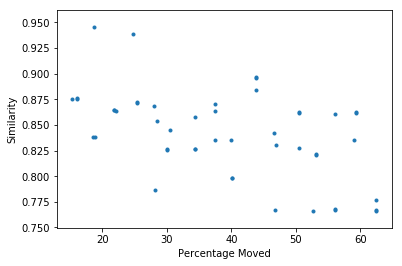

In [13]:
plt.scatter(move,simi,marker='.')
plt.ylabel('Similarity')
plt.xlabel('Percentage Moved')

plt.savefig(OUTPUT_GRAPH)

In [14]:
s=zip(move,simi)
list(s)

[(30.1, 0.8262410018176888),
 (30.1, 0.8252374946405677),
 (30.5, 0.8455415196248505),
 (34.3, 0.8261513053627676),
 (34.3, 0.8267735422279469),
 (34.4, 0.8580622443502293),
 (37.4, 0.8708008040806705),
 (37.5, 0.834984516265617),
 (37.5, 0.8637135882536592),
 (40.0, 0.8356004907838182),
 (40.1, 0.7981888388222347),
 (40.1, 0.7981185589076162),
 (43.8, 0.8845785704258529),
 (43.8, 0.8965941612797843),
 (43.8, 0.8958454362854362),
 (47.0, 0.8302929589642741),
 (46.6, 0.8419493645901496),
 (46.8, 0.7673648950123467),
 (50.5, 0.8619433910199029),
 (50.5, 0.8630935678244706),
 (50.5, 0.8275962500215961),
 (52.7, 0.7662099554610806),
 (53.1, 0.8202887417939958),
 (53.1, 0.821511587593175),
 (56.1, 0.7669186965987448),
 (56.1, 0.7679202597739322),
 (56.1, 0.8609969131909516),
 (59.1, 0.8354500603755096),
 (59.4, 0.8631251058199246),
 (59.4, 0.8619625203439268),
 (62.4, 0.766566210754673),
 (62.4, 0.7771525920342606),
 (62.5, 0.7664626204098913),
 (16.0, 0.8757304947749054),
 (16.0, 0.8765191

In [15]:
print(len(set(P1).intersection(set(P2))),len(set(P1)),len(set(P2)))

256 256 256


In [16]:
print(len(P2),len(set(P2)),len(set(P2))/len(P2))

2297887 256 0.00011140669667394436


In [17]:
set(P1).intersection(set(P2))

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
